In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
ll = likelihood_analyser.LikelihoodAnalyser()
bandwidth = 2
decimate = 10
drive_freq = 71
fsamp = 5000
def get_scale(i,phase="sin"):
    calibrationFile = step_cal_files[i]       
    calibFreqs = np.fft.rfftfreq(len(calibrationFile.electrode_data[0]), d=1./5000)
    fft_angles = np.angle(np.fft.rfft(calibrationFile.electrode_data[0]))
    if(phase=="cos"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq])%(2*np.pi)
    elif(phase=="sin"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq]+np.pi/2)%(2*np.pi)

    print(phaseResponse,np.std(calibrationFile.electrode_data[0])*np.sqrt(2))

    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': phaseResponse, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, calibrationFile.x2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [3]:
step_cal_dir = r'/data/new_trap/20210622/bead1/Discharge/FineDischarge/'
step_cal_files = load_dir(step_cal_dir, start_file=300)

100%|██████████| 280/280 [00:07<00:00, 39.34it/s]

580  files in folder
280  files loaded


In [4]:
dischargeAmps = []
for i in range(len(step_cal_files)):
    print(i,'/',len(step_cal_files))
    dischargeAmps.append(get_scale(i))

0 / 280
[0.08190331] 9.996283880412916
1 / 280
[0.08190909] 9.996281304225382
2 / 280
[0.08189878] 9.996281537733502
3 / 280
[0.08188683] 9.996288002004473
4 / 280
[0.08188301] 9.996283855239406
5 / 280
[0.0818812] 9.996280896041402
6 / 280
[0.08188132] 9.996280781109695
7 / 280
[0.08187602] 9.996281466488083
8 / 280
[0.08187166] 9.996283836062767
9 / 280
[0.08186824] 9.99628049649982
10 / 280
[0.08185259] 9.99628122742368
11 / 280
[0.08184229] 9.996278292760515
12 / 280
[0.08184375] 9.9962872679154
13 / 280
[0.08185011] 9.996282311106809
14 / 280
[0.08185688] 9.996282232848417
15 / 280
[0.08187448] 9.99628608262862
16 / 280
[0.0818733] 9.996285608676523
17 / 280
[0.08187297] 9.996284865507036
18 / 280
[0.08186803] 9.996282915362116
19 / 280
[0.08185791] 9.996282562713075
20 / 280
[0.08185112] 9.996280282430336
21 / 280
[0.08186028] 9.996284879184568
22 / 280
[0.08187175] 9.99628085579499
23 / 280
[0.08186014] 9.996283020975962
24 / 280
[0.08186719] 9.996287090219038
25 / 280
[0.081872

206 / 280
[0.0819198] 9.996282926699658
207 / 280
[0.08191724] 9.996286803289863
208 / 280
[0.08191292] 9.996282726737947
209 / 280
[0.08190771] 9.99627836823018
210 / 280
[0.08189533] 9.996286220251093
211 / 280
[0.08189578] 9.996282530728573
212 / 280
[0.08189087] 9.996279481465574
213 / 280
[0.0818991] 9.996283213603508
214 / 280
[0.08190371] 9.996283979268693
215 / 280
[0.08190964] 9.996278217408733
216 / 280
[0.08190812] 9.996281835959412
217 / 280
[0.08189192] 9.996278896802057
218 / 280
[0.08189368] 9.996275926505898
219 / 280
[0.08190671] 9.996279128442351
220 / 280
[0.08179691] 9.99627468897426
221 / 280
[0.08182042] 9.99627516703645
222 / 280
[0.08180523] 9.99627521228304
223 / 280
[0.08181146] 9.99627824130788
224 / 280
[0.08183009] 9.996278267050043
225 / 280
[0.08180829] 9.996275926682001
226 / 280
[0.08182235] 9.996279022607434
227 / 280
[0.08182145] 9.996281920292775
228 / 280
[0.08182219] 9.99628283021442
229 / 280
[0.08184658] 9.996279959458805
230 / 280
[0.08186107] 9

In [5]:
scaleX = np.abs(np.mean(dischargeAmps[180:200]))
scaleY = scaleX*-1.0502 # from discharge values in x and y
print("Scale is ", scaleY)
dischargeVoltage = np.std(step_cal_files[-1].electrode_data[0])*np.sqrt(2)
print("voltage: ", dischargeVoltage)
print(scaleX)

Scale is  -3.542952205750171e-05
voltage:  9.996282495738035
3.373597605932366e-05


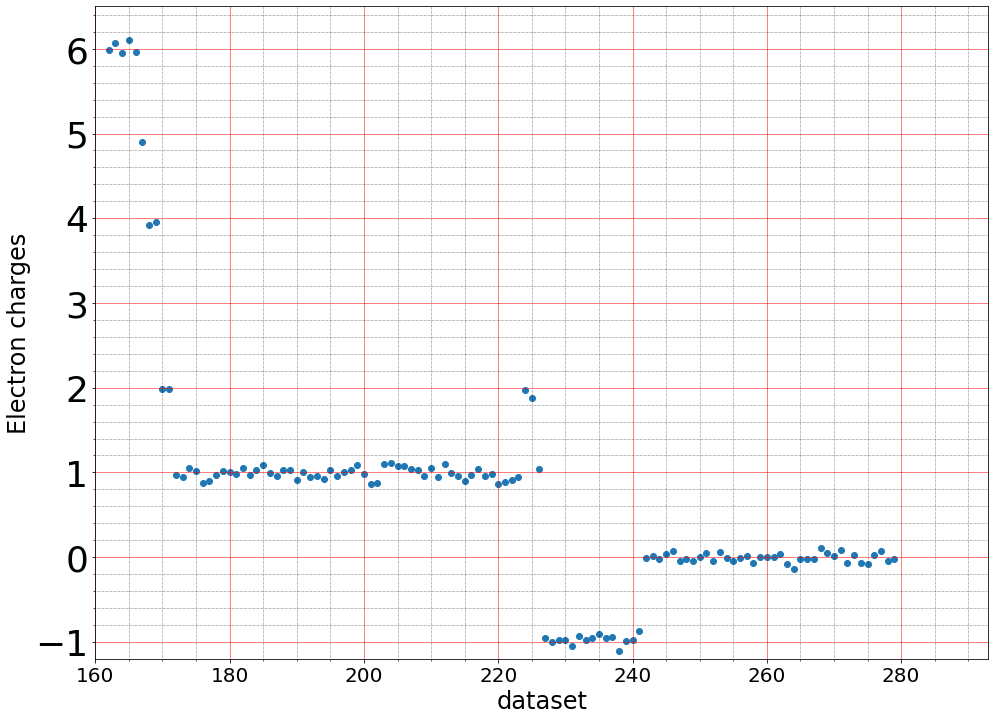

In [6]:
# amps = np.array(amps)
dischargeAmpArr = np.array(dischargeAmps)
_,ax = plt.subplots(figsize=(16,12))
# scale = 326.26

# Perrinf
ax.scatter(range(len(dischargeAmpArr)), dischargeAmpArr/scaleX, label='fit phase')
# ax.scatter(range(len(amps3)), amps3/scale, label='fit fixed-phases')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(160,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [91]:
folder = r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_2/"


In [92]:
voltage0List =[]
voltage1List =[]
for i in tqdm(range(18000)):
    try:
        trekConvFactor = 200
        fname = folder + 'Discharge_'+str(i)+'.h5'
        neutralityFile = BDF.BeadDataFile(fname=fname)
        voltage0= np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor
        voltage1= np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor
        bias = np.mean(neutralityFile.electrode_data[0])*200
        #print("voltages, bias: ", voltage0, voltage1, bias)
        voltage0List.append(voltage0)
        voltage1List.append(voltage1)
    except: 
        print("done")
        break
        







  0%|          | 0/18000 [00:00<?, ?it/s]



  0%|          | 3/18000 [00:00<11:46, 25.47it/s]



  0%|          | 8/18000 [00:00<10:25, 28.77it/s]



  0%|          | 13/18000 [00:00<09:30, 31.54it/s]



  0%|          | 18/18000 [00:00<08:36, 34.82it/s]



  0%|          | 22/18000 [00:00<08:17, 36.16it/s]



  0%|          | 27/18000 [00:00<07:54, 37.86it/s]



  0%|          | 33/18000 [00:00<07:06, 42.09it/s]



  0%|          | 38/18000 [00:00<06:49, 43.87it/s]



  0%|          | 43/18000 [00:01<07:46, 38.47it/s]



  0%|          | 48/18000 [00:01<08:00, 37.36it/s]



  0%|          | 55/18000 [00:01<06:59, 42.79it/s]



  0%|          | 60/18000 [00:01<07:29, 39.88it/s]



  0%|          | 67/18000 [00:01<06:45, 44.27it/s]



  0%|          | 72/18000 [00:01<06:56, 43.01it/s]



  0%|          | 77/18000 [00:01<07:16, 41.08it/s]



  0%|          | 83/18000 [00:01<07:02, 42.42it/s]



  0%|          | 88/18000 [00:02<07:34, 39.41it/s]



  1%|          | 94/18000 [00:02<06

  4%|▎         | 635/18000 [00:14<06:15, 46.22it/s]



  4%|▎         | 641/18000 [00:15<05:57, 48.51it/s]



  4%|▎         | 646/18000 [00:15<06:07, 47.26it/s]



  4%|▎         | 651/18000 [00:15<07:32, 38.36it/s]



  4%|▎         | 656/18000 [00:15<07:13, 40.02it/s]



  4%|▎         | 661/18000 [00:15<07:26, 38.80it/s]



  4%|▎         | 666/18000 [00:15<08:10, 35.32it/s]



  4%|▎         | 670/18000 [00:15<08:52, 32.54it/s]



  4%|▎         | 674/18000 [00:16<08:33, 33.72it/s]



  4%|▍         | 679/18000 [00:16<08:01, 35.94it/s]



  4%|▍         | 683/18000 [00:16<08:01, 35.98it/s]



  4%|▍         | 688/18000 [00:16<07:40, 37.59it/s]



  4%|▍         | 692/18000 [00:16<07:38, 37.79it/s]



  4%|▍         | 696/18000 [00:16<07:30, 38.39it/s]



  4%|▍         | 702/18000 [00:16<06:55, 41.63it/s]



  4%|▍         | 707/18000 [00:16<07:37, 37.82it/s]



  4%|▍         | 711/18000 [00:16<07:39, 37.59it/s]



  4%|▍         | 717/18000 [00:17<06:57, 41.38it/s]



  4%|▍    

  7%|▋         | 1248/18000 [00:29<06:01, 46.30it/s]



  7%|▋         | 1254/18000 [00:29<06:00, 46.41it/s]



  7%|▋         | 1259/18000 [00:29<05:56, 46.93it/s]



  7%|▋         | 1264/18000 [00:30<05:55, 47.02it/s]



  7%|▋         | 1269/18000 [00:30<06:14, 44.65it/s]



  7%|▋         | 1274/18000 [00:30<07:51, 35.46it/s]



  7%|▋         | 1278/18000 [00:30<08:08, 34.24it/s]



  7%|▋         | 1283/18000 [00:30<07:37, 36.55it/s]



  7%|▋         | 1288/18000 [00:30<07:08, 39.05it/s]



  7%|▋         | 1293/18000 [00:30<06:40, 41.68it/s]



  7%|▋         | 1298/18000 [00:30<06:53, 40.37it/s]



  7%|▋         | 1303/18000 [00:31<07:23, 37.68it/s]



  7%|▋         | 1307/18000 [00:31<07:22, 37.71it/s]



  7%|▋         | 1312/18000 [00:31<07:04, 39.36it/s]



  7%|▋         | 1317/18000 [00:31<06:58, 39.82it/s]



  7%|▋         | 1322/18000 [00:31<07:01, 39.57it/s]



  7%|▋         | 1327/18000 [00:31<06:36, 42.00it/s]



  7%|▋         | 1332/18000 [00:31<06:27, 43.00i

 10%|█         | 1856/18000 [00:44<06:25, 41.93it/s]



 10%|█         | 1861/18000 [00:44<06:36, 40.73it/s]



 10%|█         | 1866/18000 [00:44<06:27, 41.67it/s]



 10%|█         | 1871/18000 [00:44<06:11, 43.46it/s]



 10%|█         | 1876/18000 [00:45<06:13, 43.12it/s]



 10%|█         | 1882/18000 [00:45<05:57, 45.11it/s]



 10%|█         | 1887/18000 [00:45<06:11, 43.35it/s]



 11%|█         | 1892/18000 [00:45<06:28, 41.46it/s]



 11%|█         | 1897/18000 [00:45<07:51, 34.15it/s]



 11%|█         | 1901/18000 [00:45<08:25, 31.85it/s]



 11%|█         | 1905/18000 [00:45<08:21, 32.10it/s]



 11%|█         | 1909/18000 [00:46<08:23, 31.96it/s]



 11%|█         | 1913/18000 [00:46<08:14, 32.55it/s]



 11%|█         | 1917/18000 [00:46<08:39, 30.96it/s]



 11%|█         | 1922/18000 [00:46<07:53, 33.96it/s]



 11%|█         | 1928/18000 [00:46<07:36, 35.20it/s]



 11%|█         | 1933/18000 [00:46<07:02, 38.02it/s]



 11%|█         | 1937/18000 [00:46<06:58, 38.35i

 14%|█▎        | 2454/18000 [00:59<05:37, 46.08it/s]



 14%|█▎        | 2460/18000 [00:59<05:35, 46.35it/s]



 14%|█▎        | 2465/18000 [00:59<05:45, 44.90it/s]



 14%|█▎        | 2470/18000 [00:59<05:56, 43.51it/s]



 14%|█▍        | 2475/18000 [00:59<05:43, 45.23it/s]



 14%|█▍        | 2481/18000 [00:59<05:45, 44.91it/s]



 14%|█▍        | 2487/18000 [00:59<05:23, 47.91it/s]



 14%|█▍        | 2492/18000 [01:00<05:29, 47.11it/s]



 14%|█▍        | 2497/18000 [01:00<05:30, 46.87it/s]



 14%|█▍        | 2502/18000 [01:00<05:28, 47.12it/s]



 14%|█▍        | 2507/18000 [01:00<06:00, 43.01it/s]



 14%|█▍        | 2512/18000 [01:00<05:59, 43.09it/s]



 14%|█▍        | 2517/18000 [01:00<06:16, 41.14it/s]



 14%|█▍        | 2522/18000 [01:00<06:16, 41.08it/s]



 14%|█▍        | 2527/18000 [01:00<06:51, 37.60it/s]



 14%|█▍        | 2531/18000 [01:01<06:45, 38.12it/s]



 14%|█▍        | 2535/18000 [01:01<07:05, 36.31it/s]



 14%|█▍        | 2540/18000 [01:01<06:50, 37.62i

 17%|█▋        | 3044/18000 [01:13<05:25, 45.95it/s]



 17%|█▋        | 3049/18000 [01:14<05:35, 44.61it/s]



 17%|█▋        | 3054/18000 [01:14<05:41, 43.72it/s]



 17%|█▋        | 3059/18000 [01:14<05:31, 45.03it/s]



 17%|█▋        | 3064/18000 [01:14<05:36, 44.37it/s]



 17%|█▋        | 3069/18000 [01:14<05:32, 44.90it/s]



 17%|█▋        | 3074/18000 [01:14<05:23, 46.15it/s]



 17%|█▋        | 3079/18000 [01:14<05:36, 44.40it/s]



 17%|█▋        | 3084/18000 [01:14<05:42, 43.50it/s]



 17%|█▋        | 3089/18000 [01:14<05:32, 44.86it/s]



 17%|█▋        | 3094/18000 [01:15<05:42, 43.57it/s]



 17%|█▋        | 3099/18000 [01:15<05:51, 42.39it/s]



 17%|█▋        | 3104/18000 [01:15<05:37, 44.20it/s]



 17%|█▋        | 3109/18000 [01:15<05:31, 44.94it/s]



 17%|█▋        | 3114/18000 [01:15<05:48, 42.77it/s]



 17%|█▋        | 3119/18000 [01:15<06:24, 38.70it/s]



 17%|█▋        | 3123/18000 [01:15<06:32, 37.94it/s]



 17%|█▋        | 3128/18000 [01:15<06:42, 36.92i

 20%|██        | 3646/18000 [01:28<05:23, 44.38it/s]



 20%|██        | 3651/18000 [01:28<06:05, 39.28it/s]



 20%|██        | 3656/18000 [01:28<05:56, 40.21it/s]



 20%|██        | 3661/18000 [01:29<05:51, 40.83it/s]



 20%|██        | 3666/18000 [01:29<05:47, 41.27it/s]



 20%|██        | 3671/18000 [01:29<05:45, 41.49it/s]



 20%|██        | 3676/18000 [01:29<05:50, 40.84it/s]



 20%|██        | 3681/18000 [01:29<06:04, 39.33it/s]



 20%|██        | 3687/18000 [01:29<05:33, 42.91it/s]



 21%|██        | 3692/18000 [01:29<05:49, 40.97it/s]



 21%|██        | 3697/18000 [01:29<05:49, 40.87it/s]



 21%|██        | 3702/18000 [01:30<05:58, 39.93it/s]



 21%|██        | 3708/18000 [01:30<05:35, 42.64it/s]



 21%|██        | 3713/18000 [01:30<05:43, 41.55it/s]



 21%|██        | 3718/18000 [01:30<05:52, 40.51it/s]



 21%|██        | 3723/18000 [01:30<05:44, 41.40it/s]



 21%|██        | 3728/18000 [01:30<05:44, 41.37it/s]



 21%|██        | 3733/18000 [01:30<06:30, 36.50i

 24%|██▎       | 4264/18000 [01:43<04:44, 48.30it/s]



 24%|██▎       | 4270/18000 [01:43<04:32, 50.33it/s]



 24%|██▍       | 4276/18000 [01:43<04:49, 47.34it/s]



 24%|██▍       | 4281/18000 [01:44<05:09, 44.36it/s]



 24%|██▍       | 4287/18000 [01:44<05:11, 44.09it/s]



 24%|██▍       | 4293/18000 [01:44<04:49, 47.31it/s]



 24%|██▍       | 4298/18000 [01:44<05:08, 44.43it/s]



 24%|██▍       | 4303/18000 [01:44<05:06, 44.66it/s]



 24%|██▍       | 4308/18000 [01:44<05:18, 43.00it/s]



 24%|██▍       | 4313/18000 [01:44<05:14, 43.58it/s]



 24%|██▍       | 4318/18000 [01:44<05:15, 43.40it/s]



 24%|██▍       | 4324/18000 [01:44<04:58, 45.88it/s]



 24%|██▍       | 4329/18000 [01:45<05:04, 44.97it/s]



 24%|██▍       | 4334/18000 [01:45<05:24, 42.14it/s]



 24%|██▍       | 4339/18000 [01:45<05:24, 42.12it/s]



 24%|██▍       | 4344/18000 [01:45<05:17, 43.00it/s]



 24%|██▍       | 4349/18000 [01:45<05:10, 43.98it/s]



 24%|██▍       | 4354/18000 [01:45<05:13, 43.56i

done


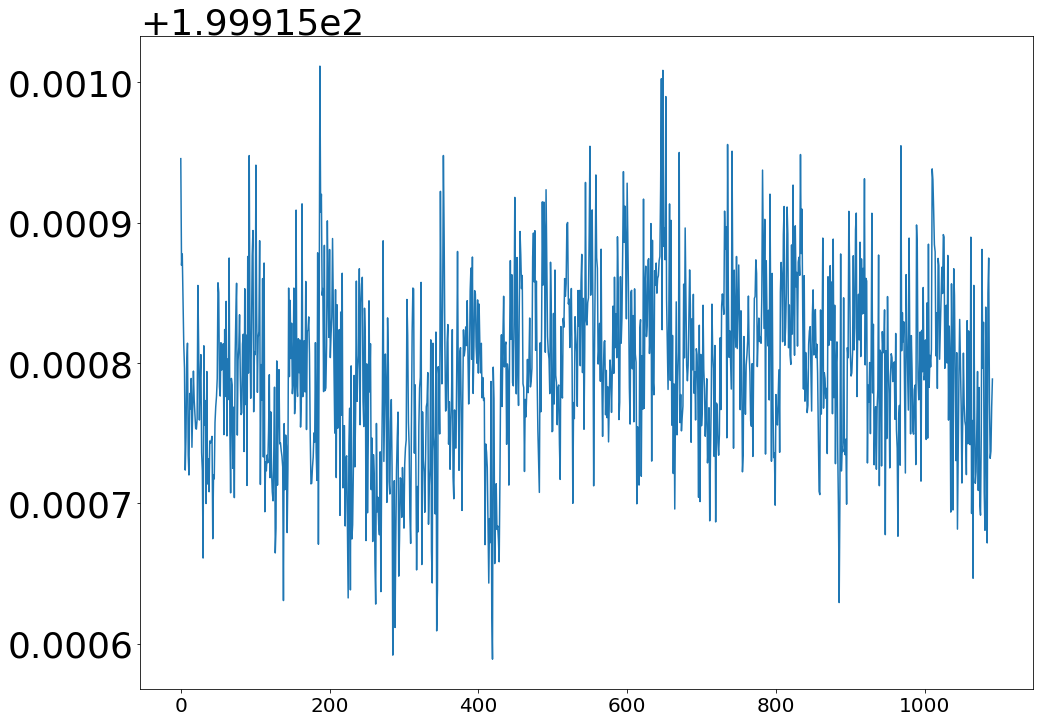

In [96]:
plt.plot(voltage1List[2::4])

In [ ]:
def Tget_response(i,folder,drive_freq=71,axis="x",phaseCalib1 = -0.0563):
    ll = likelihood_analyser.LikelihoodAnalyser()

    bandwidth = 2
    decimate = 10
    fsamp =5000
    drive_freq1=drive_freq
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BDF.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq1, 'phi': phaseCalib1, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    if(axis=="x"):
        inSignal=neutralityFile.x2
    if(axis=="y"):
        inSignal=neutralityFile.y2
    if(axis=="z"):
        inSignal=neutralityFile.z2
    
    b, a = signal.butter(3, [2.*(drive_freq1-bandwidth/2.)/fsamp, 2.*(drive_freq1+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, inSignal)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

def Tget_voltage(i,folder):
    trekConvFactor = 200
    fname = folder + 'Discharge_'+str(i)+'.h5'
    neutralityFile = BDF.BeadDataFile(fname=fname)
    voltage0= np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor
    voltage1= np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor
    bias = np.mean(neutralityFile.electrode_data[0])*200
    #print("voltages, bias: ", voltage0, voltage1, bias)
    appliedVoltage=max(np.abs(voltage0),np.abs(voltage1))
    return appliedVoltage

def get_response_total(i,folder,drive_freq=71,axis="x",phaseCalib1 = -0.0563):
    appliedVoltage= get_voltage(i,folder)
    firstVal = get_response(i,folder,drive_freq,axis,phaseCalib1)
    secondVal = get_response(i,folder,2*drive_freq,axis,phaseCalib1+np.pi/2)
    return appliedVoltage,firstVal,secondVal
